# 🍷 Clustering de Vinhos com Gaussian Mixture Models (GMM)

Este projeto utiliza o algoritmo **Gaussian Mixture Models (GMM)** para realizar **clustering não supervisionado** no renomado dataset de vinhos `load_wine`, disponibilizado pela biblioteca `scikit-learn`. O objetivo é segmentar vinhos com base em suas características químicas e avaliar o quanto os agrupamentos se aproximam das **classes reais de vinho**.

---

## 🎯 Objetivos

- Normalizar os dados e realizar análise exploratória.
- Reduzir a dimensionalidade dos dados com PCA para visualização.
- Aplicar o modelo GMM para identificar agrupamentos naturais.
- Avaliar a qualidade dos clusters com métricas quantitativas.
- Comparar os clusters com os rótulos reais por meio de métricas supervisionadas.
- Visualizar resultados em gráficos e interpretar os agrupamentos.

---

## 📦 Tecnologias Utilizadas

- **Python 3**
- `pandas`, `numpy`
- `matplotlib`, `seaborn`
- `scikit-learn`

---

## 🧪 Etapas do Projeto

### 1. 📥 Carregamento e Pré-processamento
- Dataset: `load_wine` da `sklearn.datasets`
- 13 variáveis numéricas representando compostos químicos dos vinhos.
- Normalização com `StandardScaler` para padronizar as escalas.

### 2. 🔻 Redução de Dimensionalidade
- Aplicação de `PCA` para compressão em 2 dimensões, facilitando visualizações.

### 3. 🤖 Clustering com GMM
- Teste com `K` variando de 2 a 10 clusters.
- Avaliação da qualidade com:
  - **Silhouette Score** (quanto maior, melhor)
  - **Calinski-Harabasz Index** (quanto maior, melhor)
  - **Davies-Bouldin Index** (quanto menor, melhor)

### 4. 🧠 Escolha do Melhor Número de Clusters
- Seleção do `K` ótimo com base no maior **Silhouette Score**.

### 5. 🧾 Avaliação do Agrupamento Final
- Cálculo das métricas:
  - `Silhouette Score`
  - `Calinski-Harabasz`
  - `Davies-Bouldin`
  - `Adjusted Rand Index (ARI)`
  - `Acurácia` após **relabeling**
- Comparação com os rótulos reais por meio da **matriz de confusão**.

### 6. 📊 Visualizações
- Gráficos de linha para análise das métricas em diferentes `K`.
- Visualização bidimensional com PCA e cores por cluster.
- Heatmaps para comparação dos rótulos reais com os rótulos de cluster.

---

## 📈 Gráficos Gerados

### 1. 🧪 Comparação de Métricas
- Mostra como as métricas variam com `K`, ajudando a encontrar o melhor número de clusters.

### 2. 🔀 Matriz de Confusão (Antes e Depois do Relabeling)
- Mostra a correspondência entre os clusters descobertos e as classes reais (0, 1, 2).
- Após o **relabeling**, é possível calcular **acurácia** com mais coerência.

### 3. 🌐 Visualização com PCA
- Pontos representam vinhos projetados em 2D com base nas suas características.
- As cores indicam os clusters atribuídos pelo modelo GMM.

---

## 📌 Resultados Principais

- 🔥 **Melhor K (clusters):** `3`
- 🎯 **Silhouette Score:** `~0.2849`
- 📊 **Calinski-Harabasz Score:** `~70.94`
- 🔹 **Davies-Bouldin Score:** `~1.38`
- ⚖️ **Adjusted Rand Index (ARI):** `~0.8975`
- ✅ **Acurácia (com relabeling):** `~0.97`

---

## 🧠 Interpretação dos Rótulos

> Os rótulos de cluster (`0`, `1`, `2`) gerados pelo GMM são **arbitrários**.  
> Eles **não correspondem necessariamente** à ordem das classes reais no dataset (`Barolo`, `Grignolino`, `Barbera`).  
> Por isso, utilizamos **relabeling** com base na moda de cada grupo para alinhar os clusters aos rótulos verdadeiros e permitir avaliação com métricas supervisionadas como **acurácia**.

---

## ▶️ Como Executar

1. Clone o repositório ou copie os arquivos.
2. Instale as dependências:

```bash
pip install pandas numpy matplotlib seaborn scikit-learn



✨ Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
d

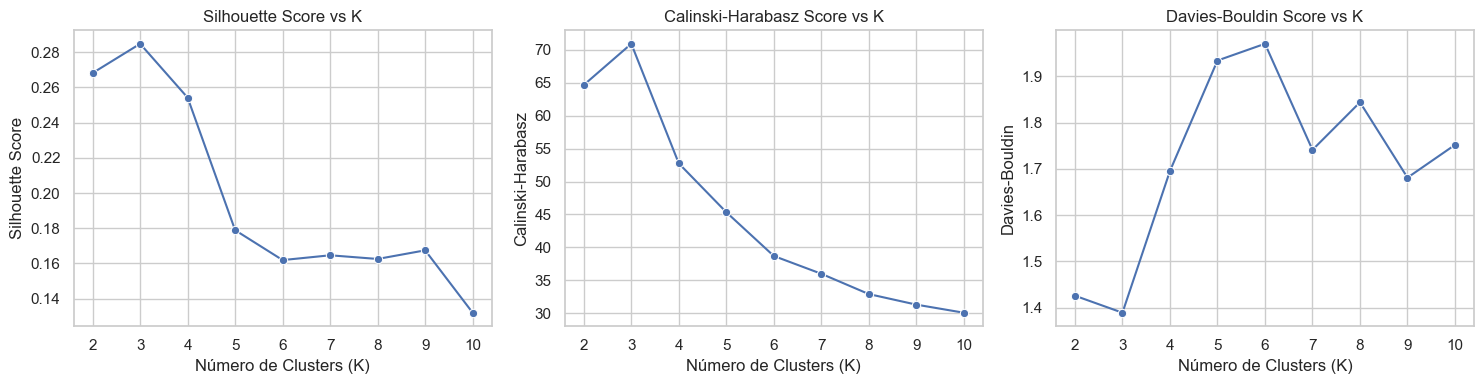


🔥 Melhor K com base no Silhouette Score: 3

🎯 Silhouette Score: 0.2849
📊 Calinski-Harabasz Score: 70.9400
🔹 Davies-Bouldin Score: 1.3892
⚖️ Adjusted Rand Index (com rótulos reais): 0.8975


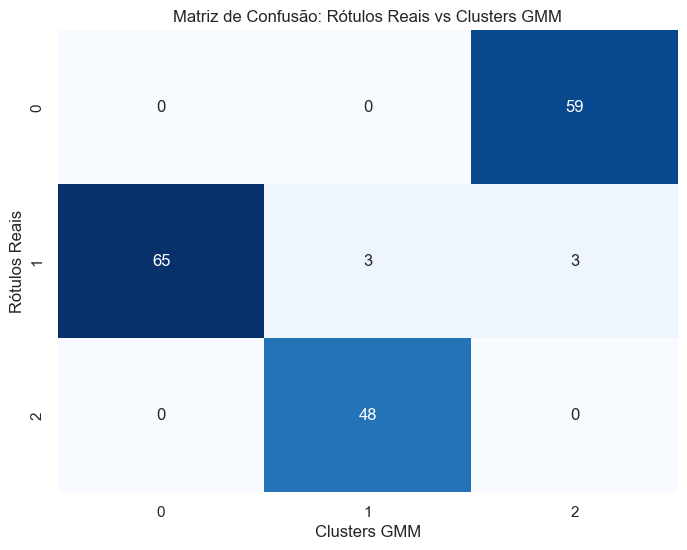

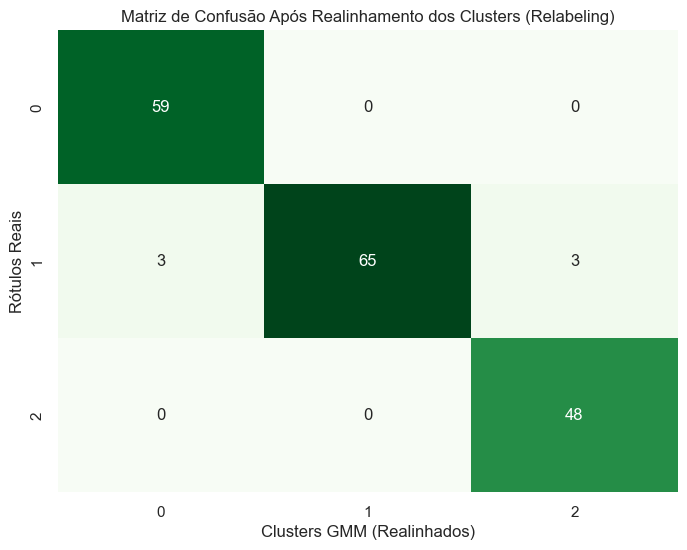

✅ Acurácia após relabeling: 0.9663


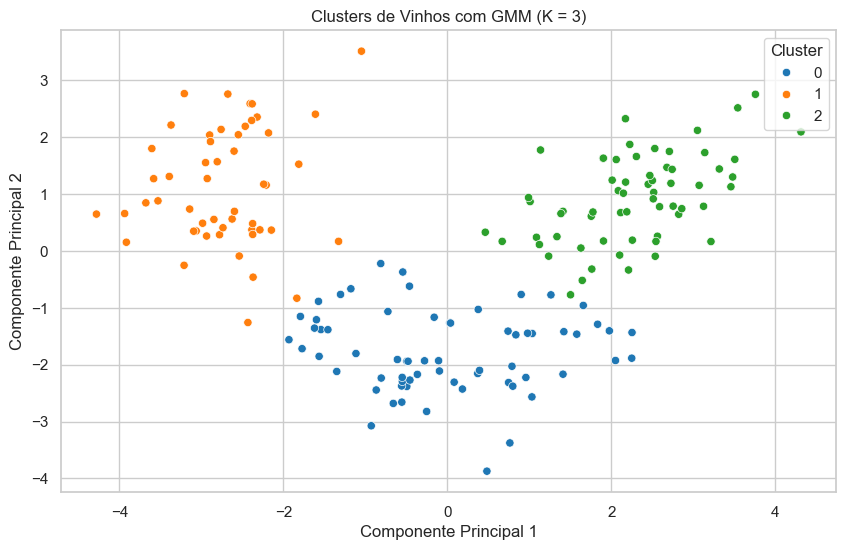

In [39]:
# 🍷 Clustering de Vinhos com Gaussian Mixture Models (GMM) + Avaliação Detalhada

# === Importações ===
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.metrics import (
    silhouette_score, calinski_harabasz_score,
    davies_bouldin_score, adjusted_rand_score,
    confusion_matrix
)
from sklearn.decomposition import PCA
from scipy.stats import mode

# Corrigir problemas de encoding no Windows
try:
    sys.stdout.reconfigure(encoding='utf-8')
except Exception:
    pass
from sklearn.metrics import accuracy_score

# === Configurações ===
os.environ["LOKY_MAX_CPU_COUNT"] = "4"
sns.set(style='whitegrid')

# === 1. Carregamento dos dados ===
wine = load_wine()
df = pd.DataFrame(wine.data, columns=wine.feature_names)
true_labels = wine.target

# === 2. Análise exploratória ===
print("\n✨ Info:")
print(df.info())
print("\n✨ Descritivo:")
print(df.describe())
print("\n✨ Nulos:")
print(df.isnull().sum())

# === 3. Normalização ===
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# === 4. Redução de dimensionalidade (PCA para visualização) ===
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# === 5. Avaliar GMM para diferentes valores de K ===
k_range = range(2, 11)
results = []
log_likelihood = []

for k in k_range:
    gmm = GaussianMixture(n_components=k, random_state=42)
    labels = gmm.fit_predict(scaled_data)
    results.append({
        "K": k,
        "Silhouette": silhouette_score(scaled_data, labels),
        "Calinski": calinski_harabasz_score(scaled_data, labels),
        "Davies": davies_bouldin_score(scaled_data, labels)
    })
    log_likelihood.append(gmm.score(scaled_data) * scaled_data.shape[0])  # log-likelihood total

results_df = pd.DataFrame(results)
print("\n📊 Resultados das métricas para diferentes K:")
print(results_df)

# === Gráficos das métricas para diferentes valores de K ===
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
sns.lineplot(x='K', y='Silhouette', data=results_df, marker='o')
plt.title('Silhouette Score vs K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Silhouette Score')

plt.subplot(1, 3, 2)
sns.lineplot(x='K', y='Calinski', data=results_df, marker='o')
plt.title('Calinski-Harabasz Score vs K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Calinski-Harabasz')

plt.subplot(1, 3, 3)
sns.lineplot(x='K', y='Davies', data=results_df, marker='o')
plt.title('Davies-Bouldin Score vs K')
plt.xlabel('Número de Clusters (K)')
plt.ylabel('Davies-Bouldin')

plt.tight_layout()
plt.show()

# === 6. Definição do melhor K ===
best_k = results_df.loc[results_df['Silhouette'].idxmax(), 'K']
print(f"\n🔥 Melhor K com base no Silhouette Score: {best_k}")

# === 7. Aplicar GMM final ===
final_gmm = GaussianMixture(n_components=int(best_k), random_state=42)
gmm_labels = final_gmm.fit_predict(scaled_data)
df['GMM_Cluster'] = gmm_labels

# === 8. Métricas finais ===
silhouette = silhouette_score(scaled_data, gmm_labels)
calinski = calinski_harabasz_score(scaled_data, gmm_labels)
davies = davies_bouldin_score(scaled_data, gmm_labels)
ari = adjusted_rand_score(true_labels, gmm_labels)

print(f"\n🎯 Silhouette Score: {silhouette:.4f}")
print(f"📊 Calinski-Harabasz Score: {calinski:.4f}")
print(f"🔹 Davies-Bouldin Score: {davies:.4f}")
print(f"⚖️ Adjusted Rand Index (com rótulos reais): {ari:.4f}")

# === 9. Matriz de confusão entre rótulos reais e clusters ===
plt.figure(figsize=(8, 6))
conf_matrix = confusion_matrix(true_labels, gmm_labels)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão: Rótulos Reais vs Clusters GMM')
plt.xlabel('Clusters GMM')
plt.ylabel('Rótulos Reais')
plt.show()

# === 9.1 Relabeling dos clusters ===
def relabel_clusters(true_labels, predicted_labels):
    new_labels = np.zeros_like(predicted_labels)
    for cluster in np.unique(predicted_labels):
        mask = predicted_labels == cluster
        new_labels[mask] = mode(true_labels[mask], keepdims=True)[0]
    return new_labels

relabeled_clusters = relabel_clusters(true_labels, gmm_labels)

# Matriz de confusão após realinhamento
plt.figure(figsize=(8, 6))
conf_matrix_relabel = confusion_matrix(true_labels, relabeled_clusters)
sns.heatmap(conf_matrix_relabel, annot=True, fmt='d', cmap='Greens', cbar=False)
plt.title('Matriz de Confusão Após Realinhamento dos Clusters (Relabeling)')
plt.xlabel('Clusters GMM (Realinhados)')
plt.ylabel('Rótulos Reais')
plt.show()

# === 9.2 Cálculo da Acurácia após Relabeling ===
accuracy = accuracy_score(true_labels, relabeled_clusters)
print(f"✅ Acurácia após relabeling: {accuracy:.4f}")


# === 10. Visualização final dos clusters ===
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_data[:, 0], y=pca_data[:, 1], hue=gmm_labels, palette='tab10')
plt.title(f'Clusters de Vinhos com GMM (K = {best_k})')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Cluster')
plt.show()